In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

In [2]:
# Load .env enviroment variables
load_dotenv("/Users/FinTech/PycharmProjects/Bootcamp/api_keys.env") #if you want to run the code ensure to update this

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY") #if you want to run the code ensure to update this
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY") #if you want to run the code ensure to update this

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [3]:
# Format current date as ISO format
start1 = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()
end1 = pd.Timestamp("2020-04-30", tz="America/New_York").isoformat()

start2 = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()
end2 = pd.Timestamp("2020-08-31", tz="America/New_York").isoformat()

start3 = pd.Timestamp("2020-09-01", tz="America/New_York").isoformat()
end3 = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()

start4 = pd.Timestamp("2021-01-01", tz="America/New_York").isoformat()
end4 = pd.Timestamp("2021-04-30", tz="America/New_York").isoformat()

start5 = pd.Timestamp("2021-05-01", tz="America/New_York").isoformat()
end5 = pd.Timestamp("2021-07-05", tz="America/New_York").isoformat()

# Set the tickers
ticker = ["SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY
df1 = alpaca.get_barset(
    ticker,
    timeframe,
    start = start1,
    end = end1
).df

df2 = alpaca.get_barset(
    ticker,
    timeframe,
    start = start2,
    end = end2
).df

df3 = alpaca.get_barset(
    ticker,
    timeframe,
    start = start3,
    end = end3
).df

df4 = alpaca.get_barset(
    ticker,
    timeframe,
    start = start4,
    end = end4
).df

df5 = alpaca.get_barset(
    ticker,
    timeframe,
    start = start5,
    end = end5
).df


# combine DataFrames
frames = [df1, df2, df3, df4, df5]
df = pd.concat(frames)
df.head()

SPY                                  
                             open    high     low   close    volume
time                                                               
2020-01-02 00:00:00-05:00  323.54  324.85  322.53  324.84  48217559
2020-01-03 00:00:00-05:00  321.16  323.64  321.10  322.44  58408809
2020-01-06 00:00:00-05:00  320.49  323.73  320.36  323.67  43105385
2020-01-07 00:00:00-05:00  323.02  323.54  322.24  322.76  33909984
2020-01-08 00:00:00-05:00  322.94  325.78  322.67  324.42  56581814

In [4]:
# extract closing prices
df_close_price = df.SPY.close.to_frame()
df_close_price

,close
time,
2020-01-02 00:00:00-05:00,324.84
2020-01-03 00:00:00-05:00,322.44
2020-01-06 00:00:00-05:00,323.67
2020-01-07 00:00:00-05:00,322.76
2020-01-08 00:00:00-05:00,324.42
...,...
2021-06-28 00:00:00-04:00,427.48
2021-06-29 00:00:00-04:00,427.68
2021-06-30 00:00:00-04:00,428.08


In [5]:
df_close_price['daily_change'] = df_close_price.pct_change()
df_close_price.dropna()

,close,daily_change
time,,
2020-01-03 00:00:00-05:00,322.44,-0.007388
2020-01-06 00:00:00-05:00,323.67,0.003815
2020-01-07 00:00:00-05:00,322.76,-0.002812
2020-01-08 00:00:00-05:00,324.42,0.005143
2020-01-09 00:00:00-05:00,326.62,0.006781
...,...,...
2021-06-28 00:00:00-04:00,427.48,0.002133
2021-06-29 00:00:00-04:00,427.68,0.000468
2021-06-30 00:00:00-04:00,428.08,0.000935


In [6]:
# save dataframe to csv
df_close_price.to_csv('sp500_price')

<AxesSubplot:xlabel='time'>

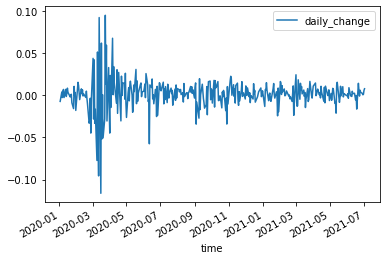

In [12]:
df_close_price.plot(y='daily_change')